# Testing the results of different models

In [1]:
import torch
from AdnGAN import Generator,Discriminator

## 1. WGAN-GP

In [3]:
Gen = Generator(channels_img=1,image_size=256).to("cuda")
Gen_2 = Generator(channels_img=1,image_size=256).to("cuda")

In [4]:
model = torch.load('trained_models\gen_256_seg_wgan_gp.pth')
model_2 = torch.load('trained_models\gen_256_seg_wgan_gp_2.pth')
Gen.load_state_dict(model)
Gen_2.load_state_dict(model_2)

<All keys matched successfully>

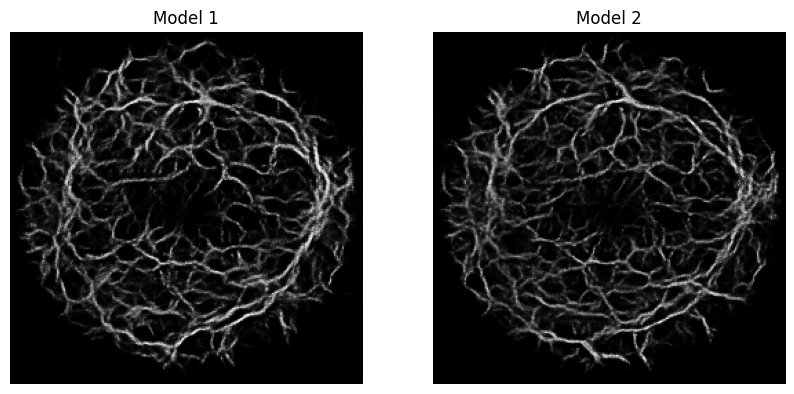

In [5]:
#Generate iamges on 4*4 grid for model1 and 4*4 for model 2 from a random noise of size 100

import matplotlib.pyplot as plt
import numpy as np

n_samples = 1
z_dim = 100

fixed_noise = torch.randn(1, z_dim, 1, 1).to("cuda")
fake_images = Gen(fixed_noise)
fake_images_2 = Gen_2(fixed_noise)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(fake_images[0].detach().cpu().numpy().squeeze(), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Model 1')
ax[1].imshow(fake_images_2[0].detach().cpu().numpy().squeeze(), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Model 2')
plt.show()